## Motivation

Learn Word2Vec as part of applied text analytics.

## Goal
Build a custom word vector from a <a href = "https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles?select=Articles.csv">news article corpus</a>. 

## Intuition

Word2Vec is an algorithm that converts words into a word vector. As people, we're able to extract meaning, semantic, context, parts of speech, and references. A word could also have multiple meanings. For example, the word 'bad' means " failing to reach an acceptable standard", but be 'good or great' in context. 

"He’s a big bad wolf in your neighborhood." have a different connotation than "He did a bad job". 

Using the Word2Vec algorithm, a model is trained to capture semantic meaning from a word corpus, which is a collection of texts or documents. Refer to this <a href = 'https://towardsdatascience.com/word2vec-explained-49c52b4ccb71'>article</a> for additional context.

These vectors can be inputs for future algorithms or models such as topic modeling and document classification.

https://www.youtube.com/watch?v=viZrOnJclY0&t=9s&pp=ygUSd29yZDJ2ZWMgc3RhdHF1ZXN0

## Notebook

In [2]:
pip install --upgrade gensim

Note: you may need to restart the kernel to use updated packages.


In [17]:
### Load Libraries
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

from tqdm.notebook import tqdm
from gensim.models import Word2Vec

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

In [18]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2023-05-18T18:14:50.155461+00:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.30.1

Compiler    : GCC 9.4.0
OS          : Linux
Release     : 4.14.313-235.533.amzn2.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit



In [19]:
%watermark --iversions

pandas    : 1.4.2
nltk      : 3.7
matplotlib: 3.5.1



In [4]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
#Source: https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles?select=Articles.csv
df = pd.read_csv('./data/Articles.csv', encoding="ISO-8859-1") 


In [6]:
df.head()

,Article,Date,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,1/1/2015,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,1/2/2015,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,1/5/2015,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,1/6/2015,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,1/6/2015,us oil prices slip below 50 a barr,business


In [7]:
df.dropna(inplace = True)

Stop words are words that do not add special meaning or context of a sentence. Adverbs like 'always', 'never', 'somewhere', articles like 'a', 'the', 'an', and Prepositions like 'from' and 'of' do not add context in a sentence. There is no object or subject of a sentence or verbs that convey action that provide semantic understanding of a document. 

In [8]:
# tokenize words from text document while removing stop words because they hold no value
def token_helper(doc):
    global stops
    payload = [word.lower() for word in word_tokenize(doc) if word not in stops and word.isalpha()]    
    return payload
    

In [9]:
## Pre-processing
"""
Tokenize and remove stop words and punctuation to help speed up processing.
"""

nltk_tokensized_bios = [token_helper(doc) for doc in tqdm(df.Article.values)]

  0%|          | 0/2692 [00:00<?, ?it/s]

In [42]:
nltk_tokensized_bios[:1]

[['karachi',
  'the',
  'sindh',
  'government',
  'decided',
  'bring',
  'public',
  'transport',
  'fares',
  'per',
  'cent',
  'due',
  'massive',
  'reduction',
  'petroleum',
  'product',
  'prices',
  'federal',
  'government',
  'geo',
  'news',
  'said',
  'reduction',
  'fares',
  'applicable',
  'public',
  'transport',
  'rickshaw',
  'taxi',
  'means',
  'karachi',
  'transport',
  'ittehad',
  'kti',
  'refused',
  'abide',
  'government',
  'president',
  'irshad',
  'bukhari',
  'said',
  'commuters',
  'charged',
  'lowest',
  'fares',
  'karachi',
  'compare',
  'parts',
  'country',
  'adding',
  'vehicles',
  'run',
  'compressed',
  'natural',
  'gas',
  'cng',
  'bukhari',
  'said',
  'karachi',
  'transporters',
  'cut',
  'fares',
  'decrease',
  'cng',
  'prices',
  'made']]

In [10]:
# Build Word2Vec Model
model = Word2Vec(nltk_tokensized_bios, min_count = 100, vector_size = 100, seed = 42, window = 10, workers = 4)

This is the vector representation of the word "bank" according to our word2vec model. You can think of each number representing coordinates in a higher dimension. 


In [11]:
model.wv['bank']

array([ 0.4988357 , -1.0745469 ,  0.46845335, -2.7778513 , -0.61720526,
        0.5787371 , -0.76873225, -0.84038496,  0.4125254 ,  0.20033999,
        0.4919085 ,  0.23618616,  0.69360876,  0.3875001 ,  0.35511592,
       -1.6649164 ,  0.44021797,  0.24317925, -0.68373686,  1.5544466 ,
       -0.6102994 , -1.5954684 ,  0.01192718, -0.15446806,  1.0097563 ,
        1.353165  , -0.1614527 ,  0.30158356,  1.3068423 , -2.0031197 ,
        0.16163388,  0.53450656, -0.3352496 ,  0.14685509, -0.79146236,
       -0.05038719, -0.22871338,  0.13978554,  1.2040085 , -0.28749618,
        1.3603234 ,  0.9927735 , -0.81781834,  0.26813266,  0.61870027,
       -0.6807379 ,  0.63473904,  0.17741199,  0.91827434, -0.07748168,
       -0.13900152, -0.38387033,  0.4507494 , -0.3966758 , -0.2385235 ,
        0.21429756,  0.73748255, -0.5982847 ,  0.1363187 ,  0.29533932,
        0.6857103 ,  0.75544965, -0.4427785 ,  0.14980723, -0.21973784,
       -0.04839982, -1.1420704 ,  0.7310373 ,  0.24874957,  0.07

We can do a reverse look-up from the vector 'model.wv['bank']' and return the word 'bank'. 

In [ ]:
model.wv.most_similar(positive=model.wv['bank'], topn=1)

[('bank', 1.0)]

Using our vocabulary, we can compare which words are most similar or share context with bank using the 'similar_by_word' function. 

In [241]:
model.wv.similar_by_word('bank')

[('central', 0.9202344417572021),
 ('monetary', 0.8817926645278931),
 ('banks', 0.8781158328056335),
 ('policy', 0.8020472526550293),
 ('financial', 0.7769354581832886),
 ('fund', 0.7675600051879883),
 ('interest', 0.7497236132621765),
 ('rates', 0.7325248718261719),
 ('reserve', 0.7067981958389282),
 ('federal', 0.6986092329025269)]

In [242]:
model.wv.similar_by_word('economy')

[('growth', 0.93217533826828),
 ('outlook', 0.9212108850479126),
 ('economic', 0.8664448857307434),
 ('manufacturing', 0.8639830350875854),
 ('emerging', 0.8573724031448364),
 ('growing', 0.8323707580566406),
 ('boost', 0.8276666402816772),
 ('recent', 0.8040652871131897),
 ('financial', 0.7973530888557434),
 ('forecast', 0.7873972058296204)]

In [24]:
model.wv.similar_by_word('china')

[('chinese', 0.9175856113433838),
 ('korea', 0.8693282008171082),
 ('investment', 0.8399731516838074),
 ('across', 0.8370951414108276),
 ('growing', 0.8199908137321472),
 ('region', 0.8161566853523254),
 ('brazil', 0.7992655038833618),
 ('manufacturing', 0.7992239594459534),
 ('largest', 0.7958722114562988),
 ('trade', 0.7871955037117004)]

In [25]:
# Vocabulary based on corpus
# model.wv.key_to_index

Because the word vector are of length 100, there are far too many dimensions to plot on a chart. I will utilize PCA as a dimensional reduction technique to 2, so we can chart words on a plot.

In [26]:
# Flatten Word Embeddings to 2-D for Visualizations

X = model.wv[model.wv.key_to_index]
pca = PCA(n_components=2)
result = pca.fit_transform(X)

In [27]:
result.shape

(856, 2)

In [39]:
# model.wv.key_to_index

In [29]:
def generate_fig(d, vocab):
    """
    d = 2-d vector
    vocab = list of vocab
    
    the lengths of both shoudl agree
    """
    plt.figure(figsize=(13,7))
    plt.scatter(d[:,0],d[:,1],linewidths=10,color='blue', alpha  = .1)
    plt.xlabel("PC1",size=15)
    plt.ylabel("PC2",size=15)
    plt.title("Word Embedding Space",size=20)
    for i, word in enumerate(vocab):
        plt.annotate(word,xy=(d[i,0],d[i,1]))
        

Taking 200 words, plot them onto the two PCA components. The closest words are, the more similar they are in context. 

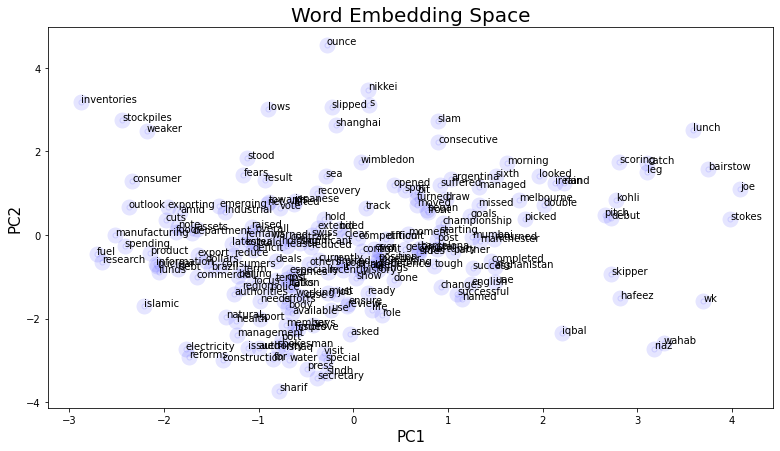

In [37]:
generate_fig(result[-200:,:], list(model.wv.key_to_index)[-200:])

In [31]:
# Vector space with 'similar words' against the word
def similar_words_vis(word):
    global model
    a = [i[0] for i in model.wv.similar_by_word(word)]
    results2 = pca.transform(model.wv[a])
    generate_fig(results2, a)

This chart shows how similar words are to 'oil'.

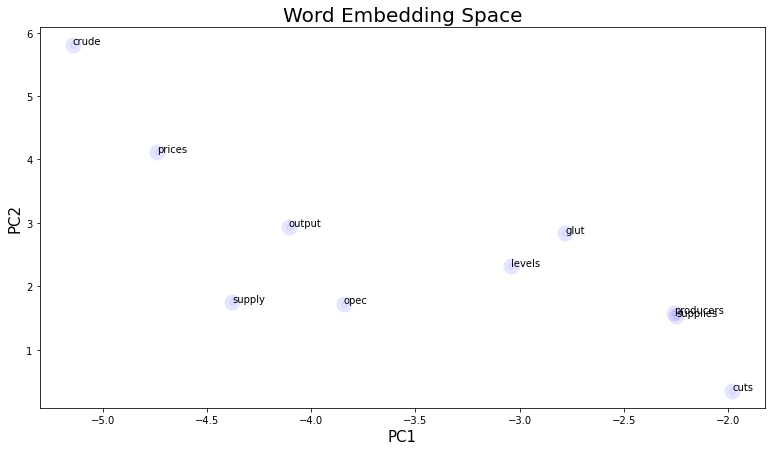

In [32]:
similar_words_vis('oil')

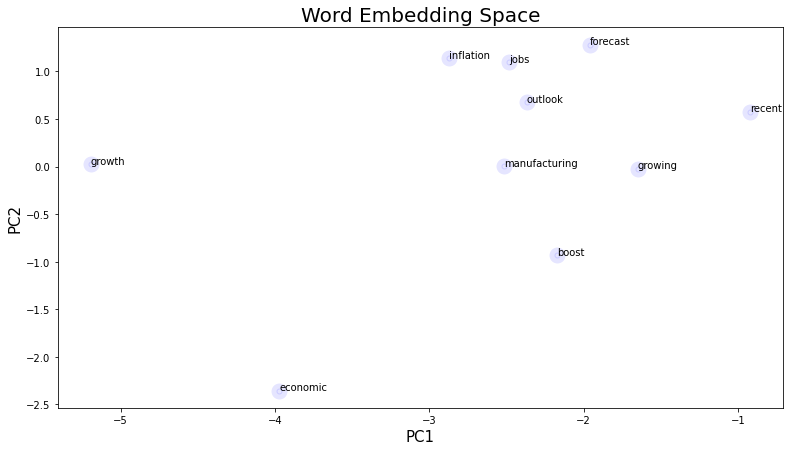

In [33]:
similar_words_vis('economy')

## Research and References
- https://www.kaggle.com/code/pierremegret/gensim-word2vec-tutorial
- https://www.youtube.com/watch?v=viZrOnJclY0&t=2s&ab_channel=StatQuestwithJoshStarmer
- https://towardsdatascience.com/visualizing-word-embedding-with-pca-and-t-sne-961a692509f5
- https://towardsdatascience.com/word2vec-explained-49c52b4ccb71
- https://machinelearningmastery.com/develop-word-embeddings-python-gensim/
- https://radimrehurek.com/gensim/models/word2vec.html
- https://towardsdatascience.com/visualization-of-word-embedding-vectors-using-gensim-and-pca-8f592a5d3354
  - for visualizations

Learned thus far:
- able to consume corpus, create a word2vect, utilize PCA to create visualizations.
- due to the window function, finding context among words is limited to 10. 

Looking ahead:
- Adopt n-grams